## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_file=pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_file.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [195]:
# Checking the number of mice in the DataFrame.
Number_of_Mice=combined_file["Mouse ID"].nunique()
Number_of_Mice

249

In [182]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_file[combined_file.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.00,0
909,g989,Propriva,Female,21,26,0,45.00,0
910,g989,Propriva,Female,21,26,5,48.79,0
911,g989,Propriva,Female,21,26,5,47.57,0
912,g989,Propriva,Female,21,26,10,51.75,0
913,g989,Propriva,Female,21,26,10,49.88,0
914,g989,Propriva,Female,21,26,15,51.33,1
915,g989,Propriva,Female,21,26,15,53.44,0
916,g989,Propriva,Female,21,26,20,55.33,1
917,g989,Propriva,Female,21,26,20,54.66,1


In [183]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = combined_file[combined_file.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.00,0
909,g989,Propriva,Female,21,26,0,45.00,0
910,g989,Propriva,Female,21,26,5,48.79,0
911,g989,Propriva,Female,21,26,5,47.57,0
912,g989,Propriva,Female,21,26,10,51.75,0
913,g989,Propriva,Female,21,26,10,49.88,0
914,g989,Propriva,Female,21,26,15,51.33,1
915,g989,Propriva,Female,21,26,15,53.44,0
916,g989,Propriva,Female,21,26,20,55.33,1
917,g989,Propriva,Female,21,26,20,54.66,1


In [202]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newtable = combined_file.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False)
newtable.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [203]:
# Checking the number of mice in the clean DataFrame.
New_Number_of_Mice=newtable["Mouse ID"].nunique()
New_Number_of_Mice

249

## Summary Statistics

In [204]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#find out what are the drug regimens
Drug_Regimen=newtable["Drug Regimen"].unique()

#Capomulin
only_Capomulin = newtable.loc[combined_file["Drug Regimen"] == "Capomulin", :]
Capomulin_mean=only_Capomulin["Tumor Volume (mm3)"].mean()
Capomulin_median=only_Capomulin["Tumor Volume (mm3)"].median()
Capomulin_variance=only_Capomulin["Tumor Volume (mm3)"].var()
Capomulin_Stdev=only_Capomulin["Tumor Volume (mm3)"].std()
Capomulin_SEM=only_Capomulin["Tumor Volume (mm3)"].sem()

#Ceftamin
only_Ceftamin = newtable.loc[combined_file["Drug Regimen"] == "Ceftamin", :]
Ceftamin_mean=only_Ceftamin["Tumor Volume (mm3)"].mean()
Ceftamin_median=only_Ceftamin["Tumor Volume (mm3)"].median()
Ceftamin_variance=only_Ceftamin["Tumor Volume (mm3)"].var()
Ceftamin_Stdev=only_Ceftamin["Tumor Volume (mm3)"].std()
Ceftamin_SEM=only_Ceftamin["Tumor Volume (mm3)"].sem()

#Infubinol
only_Infubinol = newtable.loc[combined_file["Drug Regimen"] == "Infubinol", :]
Infubinol_mean=only_Infubinol["Tumor Volume (mm3)"].mean()
Infubinol_median=only_Infubinol["Tumor Volume (mm3)"].median()
Infubinol_variance=only_Infubinol["Tumor Volume (mm3)"].var()
Infubinol_Stdev=only_Infubinol["Tumor Volume (mm3)"].std()
Infubinol_SEM=only_Infubinol["Tumor Volume (mm3)"].sem()

#Ketapril
only_Ketapril = newtable.loc[combined_file["Drug Regimen"] == "Ketapril", :]
Ketapril_mean=only_Ketapril["Tumor Volume (mm3)"].mean()
Ketapril_median=only_Ketapril["Tumor Volume (mm3)"].median()
Ketapril_variance=only_Ketapril["Tumor Volume (mm3)"].var()
Ketapril_Stdev=only_Ketapril["Tumor Volume (mm3)"].std()
Ketapril_SEM=only_Ketapril["Tumor Volume (mm3)"].sem()

#Naftisol
only_Naftisol = newtable.loc[combined_file["Drug Regimen"] == "Naftisol", :]
Naftisol_mean=only_Naftisol["Tumor Volume (mm3)"].mean()
Naftisol_median=only_Naftisol["Tumor Volume (mm3)"].median()
Naftisol_variance=only_Naftisol["Tumor Volume (mm3)"].var()
Naftisol_Stdev=only_Naftisol["Tumor Volume (mm3)"].std()
Naftisol_SEM=only_Naftisol["Tumor Volume (mm3)"].sem()

#Placebo
only_Placebo = newtable.loc[combined_file["Drug Regimen"] == "Placebo", :]
Placebo_mean=only_Placebo["Tumor Volume (mm3)"].mean()
Placebo_median=only_Placebo["Tumor Volume (mm3)"].median()
Placebo_variance=only_Placebo["Tumor Volume (mm3)"].var()
Placebo_Stdev=only_Placebo["Tumor Volume (mm3)"].std()
Placebo_SEM=only_Placebo["Tumor Volume (mm3)"].sem()

#Propriva
only_Propriva = newtable.loc[combined_file["Drug Regimen"] == "Propriva", :]
Propriva_mean=only_Propriva["Tumor Volume (mm3)"].mean()
Propriva_median=only_Propriva["Tumor Volume (mm3)"].median()
Propriva_variance=only_Propriva["Tumor Volume (mm3)"].var()
Propriva_Stdev=only_Propriva["Tumor Volume (mm3)"].std()
Propriva_SEM=only_Propriva["Tumor Volume (mm3)"].sem()

#Ramicane
only_Ramicane = newtable.loc[combined_file["Drug Regimen"] == "Ramicane", :]
Ramicane_mean=only_Ramicane["Tumor Volume (mm3)"].mean()
Ramicane_median=only_Ramicane["Tumor Volume (mm3)"].median()
Ramicane_variance=only_Ramicane["Tumor Volume (mm3)"].var()
Ramicane_Stdev=only_Ramicane["Tumor Volume (mm3)"].std()
Ramicane_SEM=only_Ramicane["Tumor Volume (mm3)"].sem()

#Stelasyn
only_Stelasyn = newtable.loc[combined_file["Drug Regimen"] == "Stelasyn", :]
Stelasyn_mean=only_Stelasyn["Tumor Volume (mm3)"].mean()
Stelasyn_median=only_Stelasyn["Tumor Volume (mm3)"].median()
Stelasyn_variance=only_Stelasyn["Tumor Volume (mm3)"].var()
Stelasyn_Stdev=only_Stelasyn["Tumor Volume (mm3)"].std()
Stelasyn_SEM=only_Stelasyn["Tumor Volume (mm3)"].sem()

#Zoniferol
only_Zoniferol = newtable.loc[combined_file["Drug Regimen"] == "Zoniferol", :]
Zoniferol_mean=only_Zoniferol["Tumor Volume (mm3)"].mean()
Zoniferol_median=only_Zoniferol["Tumor Volume (mm3)"].median()
Zoniferol_variance=only_Zoniferol["Tumor Volume (mm3)"].var()
Zoniferol_Stdev=only_Zoniferol["Tumor Volume (mm3)"].std()
Zoniferol_SEM=only_Zoniferol["Tumor Volume (mm3)"].sem()
 
#summary
summary1=pd.DataFrame({
    "name":["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],
    "mean":[Capomulin_mean,Ceftamin_mean,Infubinol_mean,Ketapril_mean,Naftisol_mean,Placebo_mean,Propriva_mean,Ramicane_mean,Stelasyn_mean,Zoniferol_mean],
    "median":[Capomulin_median,Ceftamin_median,Infubinol_median,Ketapril_median,Naftisol_median,Placebo_median,Propriva_median,Ramicane_median,Stelasyn_median,Zoniferol_median],
    "variance":[Capomulin_variance,Ceftamin_variance,Infubinol_variance,Ketapril_variance,Naftisol_variance,Placebo_variance,Propriva_variance,Ramicane_variance,Stelasyn_variance,Zoniferol_variance],
    "standard deviation":[Capomulin_Stdev,Ceftamin_Stdev,Infubinol_Stdev,Ketapril_Stdev,Naftisol_Stdev,Placebo_Stdev,Propriva_Stdev,Ramicane_Stdev,Stelasyn_Stdev,Zoniferol_Stdev],
    "SEM":[Capomulin_SEM,Ceftamin_SEM,Infubinol_SEM,Ketapril_SEM,Naftisol_SEM,Placebo_SEM,Propriva_SEM,Ramicane_SEM,Stelasyn_SEM,Zoniferol_SEM]})
summary2=summary1.set_index("name")
summary2

#"Stelasyn","Zoniferol"
#
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,mean,median,variance,standard deviation,SEM
name,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [205]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
mean=newtable.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=newtable.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance=newtable.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Stdev=newtable.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM=newtable.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary=pd.DataFrame({"mean":pd.Series(mean),
                        "median":pd.Series(median),
                        "variance":pd.Series(variance),
                        "Standard deviation":pd.Series(Stdev),
                         "SEM":pd.Series(SEM)})
pd.options.display.float_format = '{:.2f}'.format
summary
# This method produces everything in a single groupby function.

,mean,median,variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

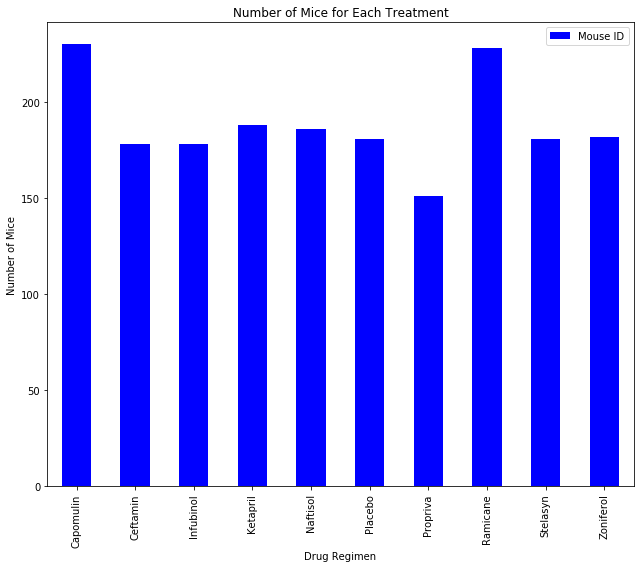

In [206]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
total_mice=pd.DataFrame(newtable.groupby("Drug Regimen")["Mouse ID"].count())

total_mice_chart=total_mice.plot(kind="bar", figsize=(9,8),color='b', title="Number of Mice for Each Treatment")
total_mice_chart.set_xlabel("Drug Regimen")
total_mice_chart.set_ylabel("Number of Mice")

plt.tight_layout()

TypeError: can only concatenate str (not "int") to str

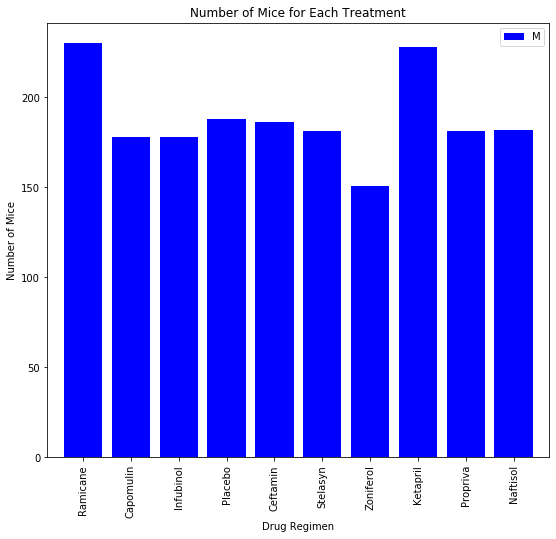

In [223]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#set x axis and tick locations 
x_axis= newtable["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]
#set y axis
total_mice1=newtable.groupby("Drug Regimen")["Mouse ID"].count()
#plot
plt.figure(figsize=(9,8))
plt.bar(x_axis,total_mice1 , color='b', align="center")
plt.xticks(tick_locations,x_axis, rotation=90)
plt.legend("Mouse ID")
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(total_mice)+50)


## Pie Plots

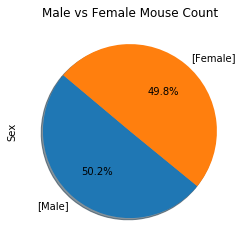

In [220]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#calcuate male and female
data=(newtable.groupby("Mouse ID")["Sex"].unique()).value_counts()
#plot pie graph
data.plot(kind='pie',autopct='%1.1f%%',shadow=True, startangle=140, title="Male vs Female Mouse Count")



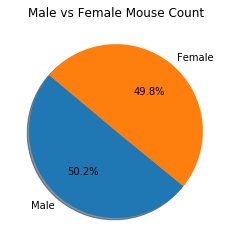

In [221]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=newtable["Sex"].unique()

plt.pie(data,labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female Mouse Count")
plt.show()



## Quartiles, Outliers and Boxplots

In [222]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.  Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor_volume=combined_file.loc[(combined_file["Timepoint"]==45), :]





In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

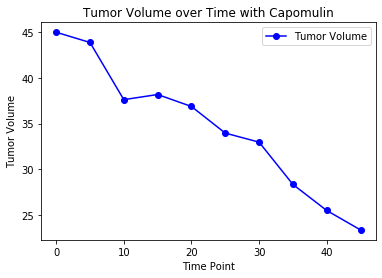

In [211]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#find a mouse ID that is being treated with Capomulin

single_mouse_ID=newtable.loc[combined_file["Drug Regimen"] == "Capomulin", :]["Mouse ID"].values[0]
#Extract values associatd with that specifci mouse ID
Single_mouse_value=newtable.loc[combined_file["Mouse ID"] == single_mouse_ID, :]
x=Single_mouse_value["Timepoint"].unique()
y=Single_mouse_value.groupby("Timepoint")["Tumor Volume (mm3)"].unique()
TumorVolume_handle, = plt.plot(x, y, marker ='o', color='blue', label="Tumor Volume")
plt.title("Tumor Volume over Time with Capomulin")
plt.legend(loc="upper right")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")

plt.show()



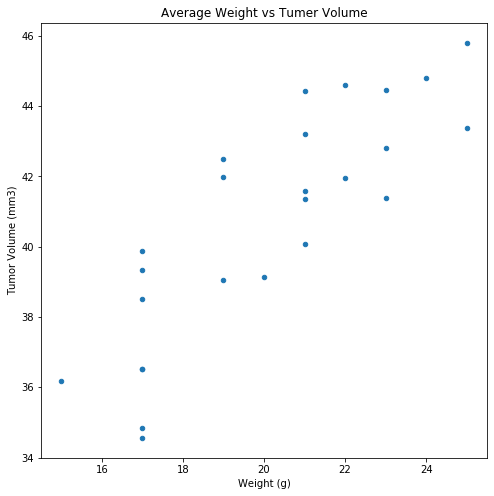

In [212]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
only_Capomulin=newtable.loc[combined_file["Drug Regimen"] == "Capomulin", :]
weight=only_Capomulin.groupby("Mouse ID")["Weight (g)"].unique()
weight = weight.astype(float)
Tumor_volume=only_Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
#plt.scatter(weight,Tumor_volume, marker="o", facecolors="red", edgecolors="black",s=x_axis, alpha=0.75)
newtable1=pd.merge(weight,Tumor_volume,on="Mouse ID")
newtable1.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(8,8),
              title="Average Weight vs Tumer Volume")

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
